# Principal Componet Analysis

> PCA주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터를 회전시키는 것입니다.
회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 새로운 특성 중 일부만 선택합니다.

다음은 PCA분석의 algorithm입니다.

## setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore")

<Figure size 864x432 with 0 Axes>

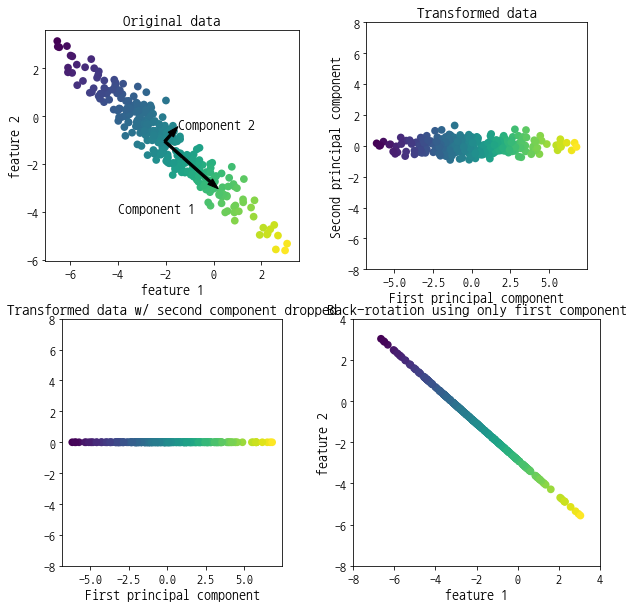

In [2]:
import mglearn
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
mglearn.plots.plot_pca_illustration()
plt.show()

1. 왼쪽 위 그래프는 원본 데이터 포인트를 색으로 구분해 표시, 이 알고리즘은 먼저 'component1'이라고 쓰여 있는, Variant(분산)이 가장 큰 방향을 찾습니다. 이 방향(벡터)가 가장 많은 정보를 담고 있는 방향이고 ==> 특성들의 상관관계가 가장 큰 방향입니다.  

2. 그 다음에 이 algorithm은 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾습니다.  

3. 2차원에서는 직각 방향은 하나지만 3차원이상부터는 무수히 많은 직각 방향이 존재하고, 이 그래프에서 화살표 머리방향은 의미가 없습니다.  

4. 이런 방법으로 찾은 방향이 데이터의 주된 Variant(분산)의 방향이라해서 principal component(주성분)이라합니다.  

5. 일반적으로 원본 특성 개수만큼의 주성분 존재합니다.  

---

* 오른쪽 위 그래프는 주성분1과 2를 각각 x축과 y축에 나란하도록 회전시켰습니다.  
* 회전하기전에 데이터에서 평균을 빼서 중심을 원점에 맞춥니다.  
* PCA에 의해 회전된 두 축은 독립이므로 변환된 데이터의 correlation matirx(상관관계 행렬)이 대각선 방향(자기자신)을 제외하고는 0이 나옵니다.  
* PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있습니다. 왼쪽 아래 그림은 첫 번재 주성분만 유지하려고하며 2차원 데이터셋이 1차원 데이터셋으로 감소하지만 단순히 원본특성 중 하나만 남기는 것이 아니라, 첫번째 방향의 성분을 유지하도록 데이터를 가공합니다.  

6. 마지막으로 데이터에 다시 평균을 더해서 반대로 회전(오른쪽 아래 그림)  

* 이 데이터들은 원래 특성 공간에 놓여 있지만 첫 번째 주성분의 정보만 담고 있음  
* 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는데 사용됩니다.


> PCA이 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화영역입니다.
breast cancer와 같은 데이터셋은 특성이 30개나 있어서 30개중 2개를 택하는 경우의 수인 435개의 산점도를 그려야하므로 단순한 시각화가 비효율적입니다.

그러나 'malignant' 'benign' 두 클래스에 대해 각 **특성의 히스토그램**을 그리면 보다 쉽게 해석 가능

## 특성의 히스토그램

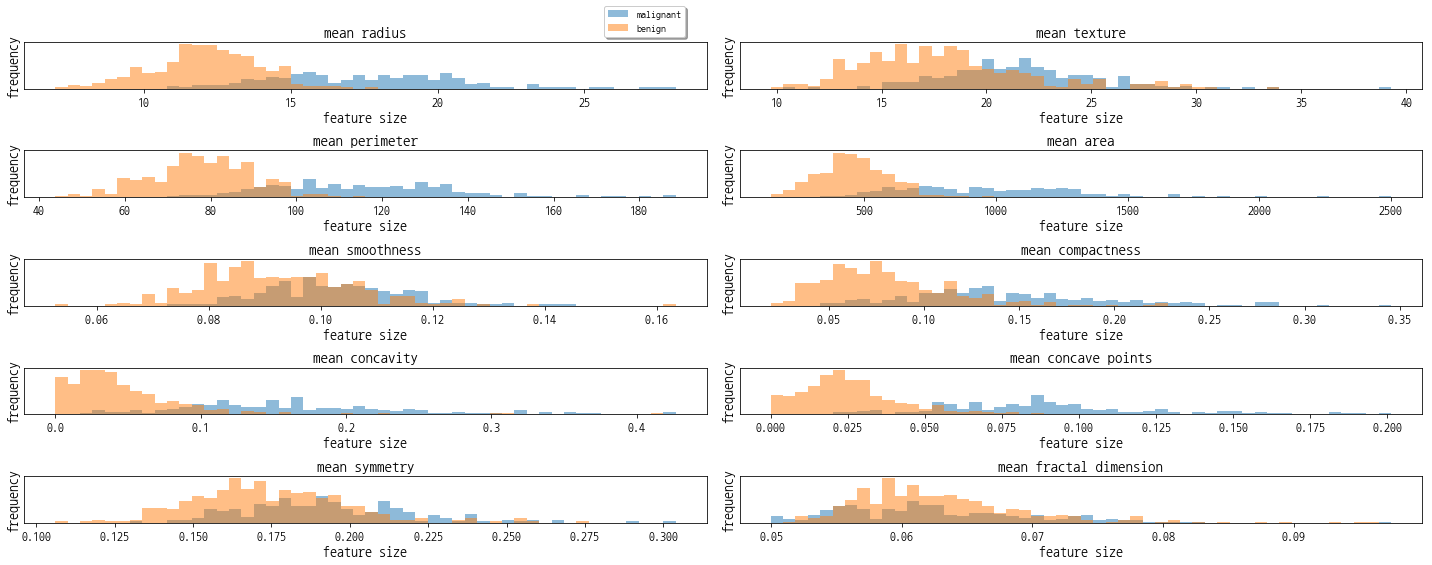

In [3]:
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer = load_breast_cancer()

# 특성이 30개이므로  5X2 3set의 plot 객체 생성합니다.
# set 1
# 특성 1 ~ 10까지의 breast cancer 히스토그램
fig, axes = plt.subplots(5, 2, figsize=(20, 8))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
target_set = np.array([malignant, benign])

for i, ax in zip(np.arange(10), axes.ravel()):
    for t in target_set:
        _, bins = np.histogram(cancer.data[:, i], bins=50) # bins: histogram 간격
        ax.hist(t[:, i], bins=bins, alpha=0.5)
        ax.set_title(cancer.feature_names[i])
        ax.set_yticks(()) 
        ax.set_xlabel('feature size') 
        ax.set_ylabel('frequency')

axes[0, 0].legend(['malignant', 'benign'], loc=(0.85, 1.1), bbox_to_anchor=(0.85, 1.1), fancybox=True, shadow=True)
fig.tight_layout()
plt.show()

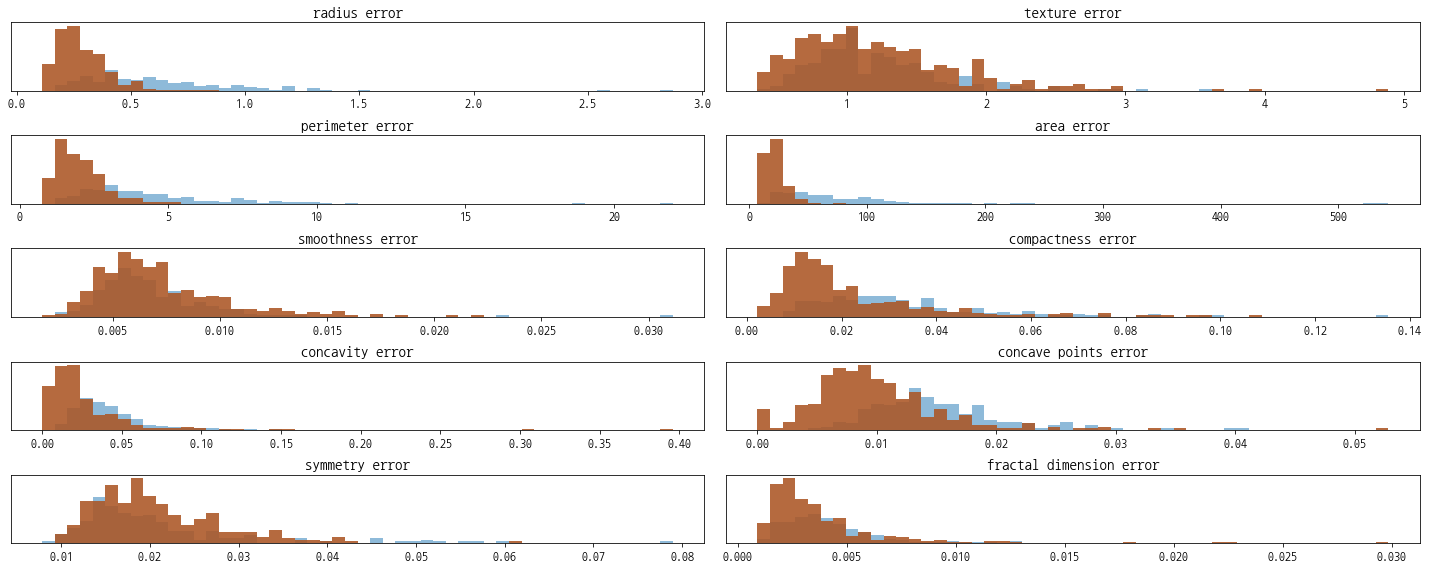

In [4]:
# set 2
# 특성 11 ~ 20까지의 breast cancer의 히스토그램
fig, axes = plt.subplots(5, 2, figsize=(20, 8))
for i, ax in zip(np.arange(10, 20), axes.ravel()):
    for t in target_set:
        _, bins = np.histogram(cancer.data[:,i], bins=50) 
        ax.hist(t[:, i], bins=bins, alpha=0.5)
        ax.hist(benign[:, i], bins=bins, alpha=0.5)
        ax.set_title(cancer.feature_names[i])
        ax.set_yticks(())

fig.tight_layout()
plt.show()

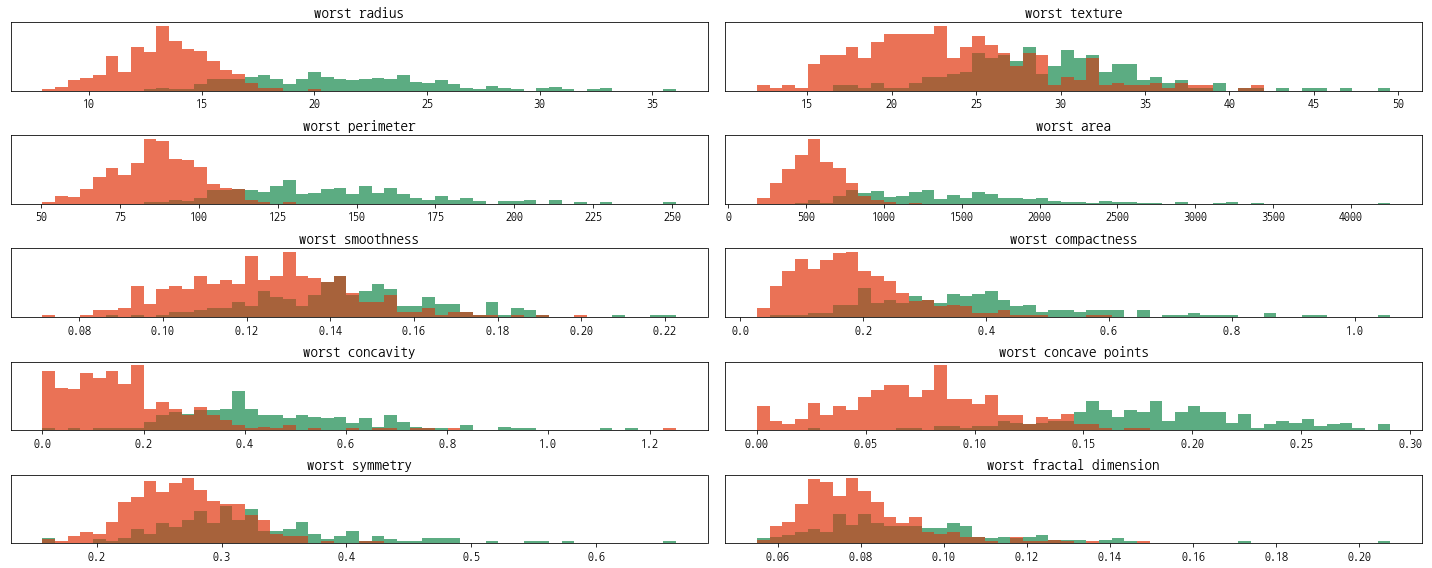

In [5]:
# set 3
# 특성 21 ~ 30까지의 breast cancer의 히스토그램
fig, axes = plt.subplots(5, 2, figsize=(20, 8))
for i, ax in zip(np.arange(20, 30), axes.ravel()):
    for t in target_set:
        _, bins = np.histogram(cancer.data[:,i], bins=50)
        ax.hist(malignant[:, i], bins=bins, alpha=0.5)
        ax.hist(benign[:, i], bins=bins, alpha=0.5)
        ax.set_title(cancer.feature_names[i])
        ax.set_yticks(())
fig.tight_layout()
plt.show()

* 각 특성에 대해 특정 간격(bin)에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 나타냈습니다.  
* 'smoothness error' 특성은 두 히스토그램이 거의 겹쳐져 불필요한 특성이고  
* 'worst concave point'는 두 히스토그램이 확실히 구분되어 매우 유용한 특성입니다.

**그러나 이 그래프는 특성 간의 상호작용이나 상호작용이 클래스와 어떤 관련이 있는지는 알려주지 못합니다.**  

---

PCA 주성분분석으로 breast cancer 데이터를 분석해보겠습니다.

## PCA Analysis

* PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 데이터 분석에 더 용이합니다.  
* PCA를 사용하기전 StandardScaler사용(평균=0, 분산=1)하여 전처리를 하겠습니다.  

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
x_scaled = scaler.transform(cancer.data)

# 기본값일 때 PCA는 데이터를 회전과 이동만 시키고 모든 주성분을 유지합니다.
# 데이터의 차원을 줄이려면 PCA객체를 만들 때 얼마나 많은 성분을 유지할지 알려주어야 합니다.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)

x_scaled_shape =  x_scaled.shape
print('x_scaled_shape: {}'.format(x_scaled_shape))

x_pca_shape = x_pca.shape
print('x_pca_shape: {}'.format(x_pca_shape))

x_scaled_shape: (569, 30)
x_pca_shape: (569, 2)


### visualization

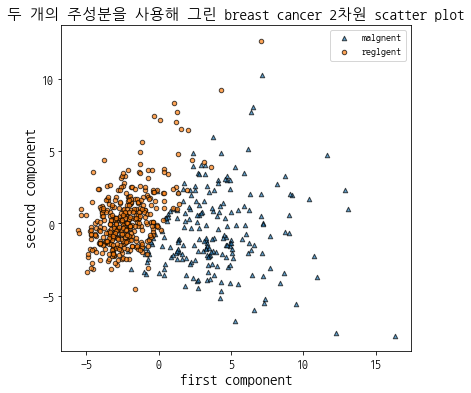

In [7]:
targets = np.unique(cancer.target)
markers = ['^', 'o']

plt.figure(figsize=(12, 6))
for target, marker in zip(targets, markers):
    plt.scatter(x_pca[cancer.target==target][:, 0], x_pca[cancer.target==target][:, 1],
                s=20, alpha=0.7, marker=marker, edgecolors='k')

plt.legend(['malgnent', 'reglgent'], loc=1)
plt.gca().set_aspect('equal') # x축과 y축의 길이를 같게합니다.
plt.xlabel('first component', size=15)
plt.ylabel('second component', size=15)
plt.title("두 개의 주성분을 사용해 그린 breast cancer 2차원 scatter plot")

plt.show()

* PCA의 단점은 그래프의 두 축을 해석하기가 쉽지 않다는 것입니다.  
* 주성분은 원본데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이며 PCA객체가 학습될 때 **components_** 속성에 주성분이 저장됩니다.  

### 주성분의 구성 요소 

In [8]:
print('pca.components_.shape: {}'.format(pca.components_.shape))
print('pca.components_: \n{}'.format(pca.components_)) # 주성분 출력

pca.components_.shape: (2, 30)
pca.components_: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


* components_의 각 행은 주성분 하나씩을 나타내며 중요도에 따라 정렬
열은 원본 데이터의 특성에 대응하는 값입니다.  

**히트맵**더 확인을 잘할 수가 있습니다.

### 히트맵으로 그려보면

<Figure size 864x432 with 0 Axes>

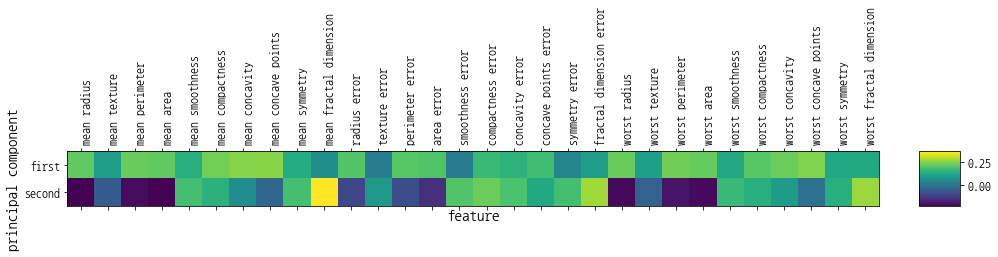

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(12, 6))
image = plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['first', 'second'])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names,
           rotation=90, ha='left')
plt.xlabel('feature', size=15)
plt.ylabel('principal component', size=15)

ax = plt.gca() # GetCurrentAxis
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad='5%')
plt.colorbar(image, cax=cax)
plt.show()

* 첫번째 주성분의 모든 특성은 부호가 같음, 모든 특성 사이에 양의 상관관계가 있습니다.  
* 두번째 주성분은 부호가 섞여있음을 알 수 있습니다.
* 모든 특성이 섞여 있기 때문에 축이 가지는 의미를 알기가 어려습니다.

---

참고 자료: 

[1]Introduction to Machine Learning with Python, Sarah Guido